In [37]:
import glob
import pandas as pd
from pandas import read_csv
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import plotly.express as px
import plotly.graph_objects as go
import os
import numpy as np
import seaborn as sns
from IPython.display import display, Image

In [38]:
# get data file names
path =r'/Users/cindymendoncapaez/opt/anaconda3/lib/python3.8/site-packages/folium/finance project/Breakout US stocks' 
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame
big_frame = pd.concat(dfs, ignore_index=True)

In [39]:
#set the column names
big_frame.columns = ['time', 'open', 'high', 'low', 'close', 'MA50', 'MA20', 'MA10', 'ADR', 'DV M', 'MA20 DV M', 'entry/exit']
big_frame

,time,open,high,low,close,MA50,MA20,MA10,ADR,DV M,MA20 DV M,entry/exit
0,2010-09-09T15:30:00+02:00,17.12000,17.17000,16.78999,17.05000,16.379900,16.839499,16.642000,3.809955,4.920191,8.414308,NaN
1,2010-09-10T15:30:00+02:00,17.11000,17.91499,16.97000,17.82001,16.438900,16.863999,16.800000,3.822202,11.175040,8.550858,NaN
2,2010-09-13T15:30:00+02:00,17.85001,18.95000,17.74001,18.67999,16.526500,16.947999,17.037999,4.012346,25.458171,9.386664,NaN
3,2010-09-14T15:30:00+02:00,18.64000,18.82001,18.37000,18.42000,16.611000,17.011499,17.299999,3.995199,14.444860,9.704984,NaN
4,2010-09-15T15:30:00+02:00,18.35001,18.95000,18.25000,18.92999,16.707599,17.075499,17.593998,3.975215,11.940623,9.674400,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
158365,2021-12-03T15:30:00+01:00,64.38000,65.00000,61.30000,61.96000,55.036200,62.547000,63.098000,4.287038,21.414607,27.081431,NaN
158366,2021-12-06T15:30:00+01:00,62.98000,64.05000,60.12000,63.45000,55.322200,62.666500,63.187000,4.341776,19.793816,26.606494,NaN
158367,2021-12-07T15:30:00+01:00,64.70000,68.96670,64.68000,68.73000,55.701600,63.010500,63.702000,4.530290,47.703452,27.804088,NaN
158368,2021-12-08T15:30:00+01:00,69.18000,69.78610,67.46100,68.91000,56.126200,63.349000,64.210000,4.584972,32.064560,28.220291,NaN


In [40]:
#find the entries

big_frame = big_frame.loc[big_frame['entry/exit']=='entry']
big_frame = big_frame.replace('entry',1)
big_frame

,time,open,high,low,close,MA50,MA20,MA10,ADR,DV M,MA20 DV M,entry/exit
1723,2017-07-14T15:30:00+02:00,152.140000,154.820000,152.120000,154.300000,145.496800,150.569000,151.495000,2.003751,79.477509,241.328168,1
4734,2021-04-23T15:30:00+02:00,27.190000,27.680000,26.810000,27.500000,26.005600,27.001500,26.927000,2.830021,2.045909,1.383159,1
6400,2016-08-03T15:30:00+02:00,23.166532,23.503909,22.930369,23.413942,22.261913,23.623116,23.744571,2.541473,143.524708,207.663470,1
9453,2017-05-31T15:30:00+02:00,84.530000,85.810000,83.305000,85.130000,78.857600,83.711000,84.076000,2.645499,5.526425,5.835718,1
9881,2019-02-12T15:30:00+01:00,86.350000,88.026200,85.870000,87.030000,81.238000,85.656000,86.376000,1.988348,2.244652,4.044765,1
...,...,...,...,...,...,...,...,...,...,...,...,...
150968,2018-02-28T15:30:00+01:00,6.530000,7.456000,6.470000,7.250000,6.030002,6.287500,6.361000,7.785079,1.562838,0.497756,1
153436,2016-08-17T15:30:00+02:00,65.970000,67.370000,65.780000,67.350000,63.107200,66.020500,65.798000,2.121894,100.810129,93.398305,1
155982,2019-05-16T15:30:00+02:00,6.480000,8.179900,6.480000,8.130000,5.875800,6.606500,6.698000,7.200307,15.797977,3.110227,1
156012,2019-06-28T15:30:00+02:00,11.060000,11.980000,10.920000,11.890000,8.983000,11.146000,11.330000,5.910406,32.540900,9.469533,1


In [41]:
df = big_frame

fig = go.Figure()

fig.add_trace(go.Bar(
    name="Middle-aligned",
    x=df["time"], y=df["entry/exit"],
    xperiod="M1",
    xperiodalignment="middle"
))
fig.update_xaxes(showgrid=True, ticklabelmode="period")
fig.show()

In [42]:
csv_directory = '/Users/cindymendoncapaez/Downloads/Breakout US stocks/breakout/csv/'

@interact
def show_csv(file=os.listdir(csv_directory)):
    global code
    display(pd.read_csv(csv_directory+file, sep = ';'))
    code = file.split('.csv')[0]

fdir = '/Users/cindymendoncapaez/Downloads/Breakout US stocks/breakout/graphs/'

@interact
def show_images(ticker_name = code):
    list_code = os.listdir(fdir)
    list_match = [x for x in list_code if x.startswith(ticker_name + '_')]
    for file in list_match:
        display(Image(fdir+file))

interactive(children=(Dropdown(description='file', options=('AEIS.csv', 'ADTN.csv', 'AMKR.csv', 'ARC.csv', 'AM…

interactive(children=(Text(value='AEIS', description='ticker_name'), Output()), _dom_classes=('widget-interact…

In [43]:
path = '/Users/cindymendoncapaez/Downloads/Breakout US stocks/breakout/csv/'

@interact
def show_csv(file=os.listdir(path)):
    global tickers
    tickers = pd.read_csv(path+file, sep = ';')
    code = file.split('.csv')[0]

    
@interact
def display_time_series(param = tickers):
    list_code = os.listdir(path)
    fig = px.line(tickers, x=tickers['time'], y=param) 
    fig.show()



interactive(children=(Dropdown(description='file', options=('AEIS.csv', 'ADTN.csv', 'AMKR.csv', 'ARC.csv', 'AM…

interactive(children=(Dropdown(description='param', options=('Unnamed: 0', 'time', 'open', 'high', 'low', 'clo…

In [44]:
#Values

days_high = tickers["high"]
days_low = tickers["low"]
days_close = tickers["close"]

#low range
daily_ranges = []

for ticker in tickers:

    exit_price = days_close

exit_price

0       73.32
1       72.49
2       70.15
3       69.50
4       67.26
        ...  
111    120.33
112    119.54
113    117.67
114    118.59
115    118.45
Name: close, Length: 116, dtype: float64

In [45]:
#high range

days_high = tickers["high"]
days_low = tickers["low"]
days_close = tickers["close"]

daily_ranges = []

for ticker in tickers:

    entry_price = (days_low + days_high) /2


entry_price

0       72.95250
1       72.99500
2       70.19500
3       69.53000
4       67.56500
         ...    
111    119.97750
112    119.47500
113    117.84005
114    118.51000
115    117.47500
Length: 116, dtype: float64

In [46]:
# Combine tickers table with Entry, Exit and Entry & Exit rows

combined_data = tickers
combined_data['entry_price'] =  entry_price
combined_data['exit_price'] = exit_price

In [47]:
combined_data

,Unnamed: 0,time,open,high,low,close,MA,MA.1,MA.2,ADR,DV M,MA20 DV M,entry/exit,entry_price,exit_price
0,0,2020-10-22T15:30:00+02:00,72.64,73.830,72.0750,73.32,68.6322,68.1715,72.458,3.021762,16.734866,17.416925,NaN,72.95250,73.32
1,1,2020-10-23T15:30:00+02:00,73.28,73.710,72.2800,72.49,68.4806,68.8100,72.667,2.995171,8.959552,17.253716,NaN,72.99500,72.49
2,2,2020-10-26T14:30:00+01:00,71.51,71.820,68.5700,70.15,68.2830,69.2185,72.509,3.031096,15.113966,17.191543,NaN,70.19500,70.15
3,3,2020-10-27T14:30:00+01:00,69.71,70.110,68.9500,69.50,68.0372,69.5480,72.243,2.966021,12.505249,16.696366,NaN,69.53000,69.50
4,4,2020-10-28T14:30:00+01:00,68.29,68.480,66.6500,67.26,67.7932,69.7640,71.757,2.941496,16.116685,16.422192,NaN,67.56500,67.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,111,2021-04-05T15:30:00+02:00,120.00,122.355,117.6000,120.33,107.6792,106.6065,107.991,4.585894,47.463939,33.318239,NaN,119.97750,120.33
112,112,2021-04-06T15:30:00+02:00,119.81,121.400,117.5500,119.54,107.6934,107.7670,109.458,4.405024,26.400510,33.070355,NaN,119.47500,119.54
113,113,2021-04-07T15:30:00+02:00,119.10,119.200,116.4801,117.67,107.7564,108.4520,111.188,4.218549,15.581283,32.254376,NaN,117.84005,117.67
114,114,2021-04-08T15:30:00+02:00,120.32,120.320,116.7000,118.59,107.9014,109.1930,112.864,4.205248,22.302397,32.495061,NaN,118.51000,118.59


In [48]:
#First entry & Last exit code with profit. Please notice that the underlined rows are the ones to look at.

csv_directory = '/Users/cindymendoncapaez/Downloads/Breakout US stocks/breakout/csv/'

@interact
def show_csv(file=os.listdir(csv_directory)):
    tickers = pd.read_csv(path+file, sep = ',')
    combined_data = tickers
    combined_data.columns = ['time', 'open', 'high', 'low', 'close', 'MA50', 'MA20', 'MA10', 'ADR', 'DV M', 'MA20 DV M', 'entry/exit'] 
    days_high = tickers["high"]
    days_low = tickers["low"]
    days_close = tickers["close"]
    combined_data['entry_price'] = (days_low + days_high) /2
    combined_data['exit_price'] = days_close
    last_exit = combined_data.groupby(['entry/exit'], as_index='exit').last()
    first_entry = combined_data.groupby(['entry/exit'], as_index='entry').first()
    last_exit_style = last_exit.style.set_properties(subset = pd.IndexSlice[['exit'], :], **{'background-color' : 'yellow'})
    first_entry_style = first_entry.style.set_properties(subset = pd.IndexSlice[['entry'], :], **{'background-color' : 'yellow'})
    display (first_entry_style)
    display (last_exit_style)

interactive(children=(Dropdown(description='file', options=('AEIS.csv', 'ADTN.csv', 'AMKR.csv', 'ARC.csv', 'AM…

In [49]:
#Profit, risk and R calculators


@interact
def show_csv(file=os.listdir(csv_directory)):
    tickers = pd.read_csv(path+file, sep = ',')
    combined_data = tickers
    combined_data.columns = ['time', 'open', 'high', 'low', 'close', 'MA50', 'MA20', 'MA10', 'ADR', 'DV M', 'MA20 DV M', 'entry/exit'] 
    days_high = tickers["high"]
    days_low = tickers["low"]
    days_close = tickers["close"]
    combined_data = combined_data[combined_data['entry/exit'].isin(["entry","exit"])]
    combined_data['entry_price']= np.NaN
    combined_data['exit_price'] = np.NaN    
    combined_data['profit'] = np.NaN
    combined_data['risk'] = np.NaN
    combined_data['R'] = np.NaN
    combined_data.loc[combined_data['entry/exit'].isin(["entry"]), 'entry_price'] = (combined_data['low'] + combined_data['high']) /2
    combined_data.loc[combined_data['entry/exit'].isin(["exit"]), 'exit_price'] = combined_data['close']
    combined_data['entry_price'] = combined_data['entry_price'].fillna(method='ffill')
    combined_data.loc[combined_data['entry/exit'].isin(["exit"]), 'profit'] = combined_data['exit_price']-combined_data['entry_price']
    combined_data.loc[combined_data['entry/exit'].isin(["entry"]),'risk'] = combined_data['entry_price']-combined_data['low']
    combined_data['risk'] = combined_data['risk'].fillna(method='ffill')
    combined_data.loc[combined_data['entry/exit'].isin(["exit"]), 'R'] = combined_data['profit']/combined_data['risk']
    display(combined_data)

interactive(children=(Dropdown(description='file', options=('AEIS.csv', 'ADTN.csv', 'AMKR.csv', 'ARC.csv', 'AM…

In [53]:
returns = combined_data
returns['Return'] = returns['close'].pct_change()
returns.head()

,Unnamed: 0,time,open,high,low,close,MA,MA.1,MA.2,ADR,DV M,MA20 DV M,entry/exit,entry_price,exit_price,Return
0,0,2020-10-22T15:30:00+02:00,72.64,73.83,72.075,73.32,68.6322,68.1715,72.458,3.021762,16.734866,17.416925,NaN,72.9525,73.32,NaN
1,1,2020-10-23T15:30:00+02:00,73.28,73.71,72.280,72.49,68.4806,68.8100,72.667,2.995171,8.959552,17.253716,NaN,72.9950,72.49,-0.011320
2,2,2020-10-26T14:30:00+01:00,71.51,71.82,68.570,70.15,68.2830,69.2185,72.509,3.031096,15.113966,17.191543,NaN,70.1950,70.15,-0.032280
3,3,2020-10-27T14:30:00+01:00,69.71,70.11,68.950,69.50,68.0372,69.5480,72.243,2.966021,12.505249,16.696366,NaN,69.5300,69.50,-0.009266
4,4,2020-10-28T14:30:00+01:00,68.29,68.48,66.650,67.26,67.7932,69.7640,71.757,2.941496,16.116685,16.422192,NaN,67.5650,67.26,-0.032230


<AxesSubplot:xlabel='Return', ylabel='Count'>

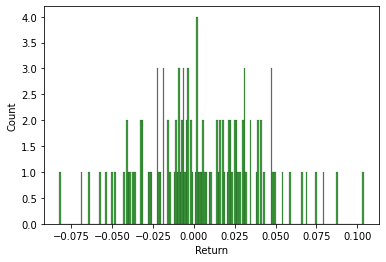

In [55]:
sns.histplot(returns['Return'],color='green',bins=200)